In [1]:
import numpy as np
import os
import pickle

# IMPORTO I DATI PER VOTTIGNASCO

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy"
v_test_image_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy"
v_test_target_dates_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy"
v_test_images_dates = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_image_sequences_dates.npy"
v_test_normalization_factors_std_path  = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_std.npy"
v_test_normalization_factors_mean_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_mean.npy"

# Carica l'array numpy dai file
vottignasco_test_OHE         = np.load(v_test_OHE_path)
vottignasco_test_image       = np.load(v_test_image_path)
vottignasco_test_dates       = np.load(v_test_target_dates_path)
vottignasco_test_image_dates = np.load(v_test_images_dates)
vott_target_test_std         = np.load(v_test_normalization_factors_std_path) 
vott_target_test_mean        = np.load(v_test_normalization_factors_mean_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [2]:
import sys 

# Aggiungi il percorso della cartella XAI (risali di tre livelli dal notebook)
xai_path = os.path.abspath(os.path.join('..', '..', '..'))
sys.path.append(xai_path)


In [3]:
from common import plots

In [4]:
import importlib

# Forza il reload del modulo
importlib.reload(plots)

<module 'common.plots' from '/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/common/plots.py'>

In [5]:
import pickle

path_to_load_results = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/results/01_marco_spatial_rise_original_20250310175211/rise_original_spatial_results_all_setup.pkl"
# Load della lista results
with open(path_to_load_results, 'rb') as file:
  result_rise_spatial_all = pickle.load(file)

In [ ]:
# Legenda nr_setup 
# h,w=(1,2) con p: 0.1...0.9 -> nr_setup=0..8
# h,w=(2,1) con p: 0.1...0.9 -> nr_setup=9..17
# h,w=(2,2) con p: 0.1...0.9 -> nr_setup=18..26
# h,w=(2,3) con p: 0.1...0.9 -> nr_setup=27..34
# h,w=(2,4) con p: 0.1...0.9 -> nr_setup=35..44

In [ ]:
import matplotlib.pyplot as plt

for result in result_rise_spatial_all:

    # Crea la figura e la griglia 2x2
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Saliency Maps S1, S2, S3, S4')

    param = result["parameters_comb"]

    nr_instance = 0
    for index_i, ax in enumerate(axes.flat, start=1):
        s_i = result["saliency_maps"][nr_instance, index_i-1, :]
        cmap = "PuBu" if index_i not in [2, 4] else "PuBu_r"

    # Usa la nuova funzione per plottare nella griglia
    plots.plot_frame(s_i, cmap=cmap, title=f"S{index_i} for {param}", ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [6]:
import matplotlib.pyplot as plt
import os

total_auc_insertion_s2_all = []
total_auc_deletion_s2_all  = []

total_auc_insertion_s3_all = []
total_auc_deletion_s3_all  = []

total_auc_insertion_s4_all = []
total_auc_deletion_s4_all  = []

for result in result_rise_spatial_all:

    param = result["parameters_comb"]
    only_h_w_param = param[0:5]

    # Percorso dove salvare il plot
    output_dir = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_{only_h_w_param}"
    
    # Crea la figura e la griglia 2x2
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Saliency Maps S1, S2, S3, S4')

    nr_instance = 0
    for index_i, ax in enumerate(axes.flat, start=1):
        s_i = result["saliency_maps"][nr_instance, index_i-1, :]
        cmap = "PuBu" if index_i not in [2, 4] else "PuBu_r"

        # Usa la nuova funzione per plottare nella griglia
        plots.plot_frame(s_i, cmap=cmap, title=f"S{index_i} for {param}", ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Salva l'immagine
    output_path = os.path.join(output_dir, f"{param}_saliency_maps_0_.png")
    plt.savefig(output_path, dpi=300)  # dpi=300 per alta risoluzione

    plt.close()  # Chiudi la figura per liberare memoria
    print(f"Plot salvato in: {output_path}")

    for index_i in range(2,5):
        s_i_errors_insertion = result["errors_insertion"][:,index_i-1,:]
        s_i_errors_deletion  = result["errors_deletion"][:,index_i-1,:]

        output_path_ins_del = os.path.join(output_dir, f"{param}_ins_del_S_{index_i}.png")
        auc_insertion_s_i,auc_deletion_s_i = plots.plot_combined_curves(s_i_errors_insertion, s_i_errors_deletion, title=f"Ins/Del Mean Curves S{index_i}_{param}", save=True,
                                                                       save_path=output_path_ins_del)
        
        if (index_i == 2):
            total_auc_insertion_s2_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s2_all.append([auc_deletion_s_i, param])
        elif (index_i == 3):
            total_auc_insertion_s3_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s3_all.append([auc_deletion_s_i, param])
        else:
            total_auc_insertion_s4_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s4_all.append([auc_deletion_s_i, param])

        plt.close()


Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_h1_w2/h1_w2_p01_saliency_maps_0_.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_h1_w2/h1_w2_p02_saliency_maps_0_.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_h1_w2/h1_w2_p03_saliency_maps_0_.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_h1_w2/h1_w2_p04_saliency_maps_0_.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_h1_w2/h1_w2_p05_saliency_maps_0_.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/result_spatial_h1_w2/h1_w2_p06_saliency_maps_0_.png
Plot

In [7]:
from collections import defaultdict

def group_by_hw(data):
    """
    Raggruppa una lista di [auc, param] in base alla coppia (h, w).
    
    Args:
        data (list): Lista di coppie [auc, param], dove param ha il formato 'hX_wY_pZZ'.
    
    Returns:
        list: Lista di liste raggruppate per ogni combinazione (h, w).
    """
    grouped = defaultdict(list)
    
    for auc, param in data:
        # Estrai 'hX_wY' dalla stringa 'hX_wY_pZZ'
        hw = "_".join(param.split('_')[:2])
        grouped[hw].append([auc, param])
    
    # Converti il dizionario in lista di liste
    return list(grouped.values())

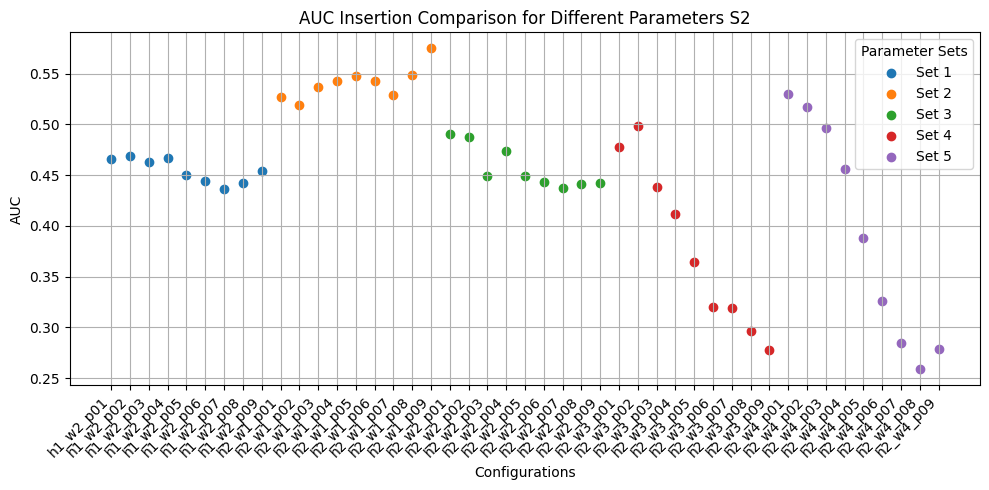

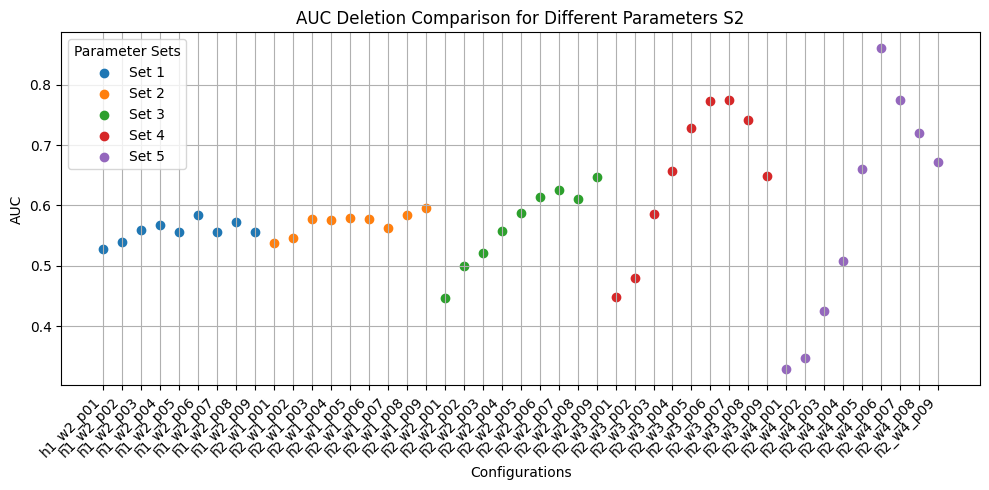

In [9]:
auc_ins_S2_all_grouped_setup = group_by_hw(total_auc_insertion_s2_all)
auc_del_S2_all_grouped_setup = group_by_hw(total_auc_deletion_s2_all)

plots.plot_multiple_auc_comparisons(auc_ins_S2_all_grouped_setup, title="AUC Insertion Comparison for Different Parameters S2")
plots.plot_multiple_auc_comparisons(auc_del_S2_all_grouped_setup, title="AUC Deletion Comparison for Different Parameters S2")

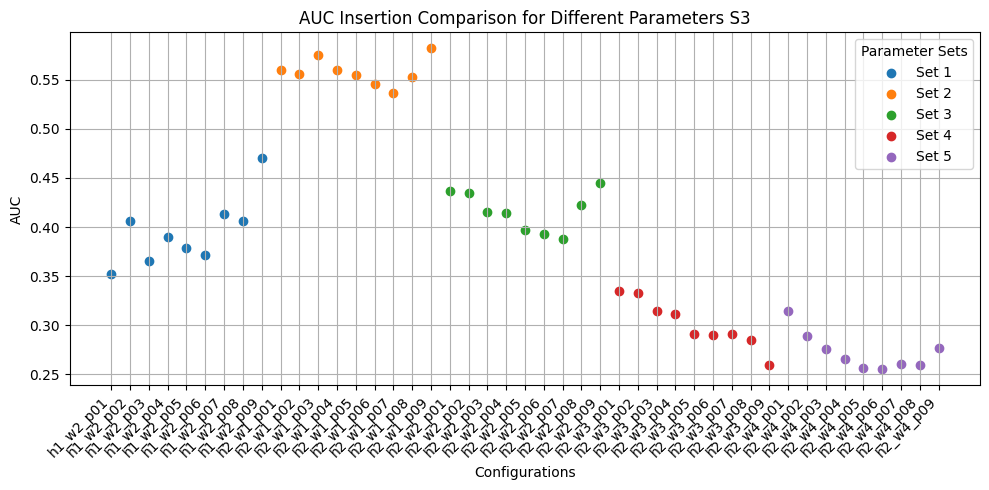

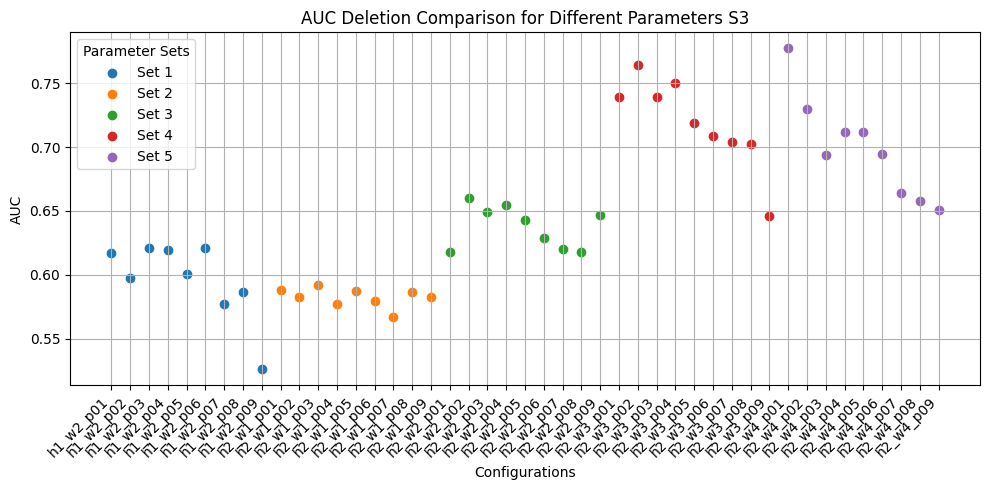

In [10]:
auc_ins_S3_all_grouped_setup = group_by_hw(total_auc_insertion_s3_all)
auc_del_S3_all_grouped_setup = group_by_hw(total_auc_deletion_s3_all)

plots.plot_multiple_auc_comparisons(auc_ins_S3_all_grouped_setup, title="AUC Insertion Comparison for Different Parameters S3")
plots.plot_multiple_auc_comparisons(auc_del_S3_all_grouped_setup, title="AUC Deletion Comparison for Different Parameters S3")

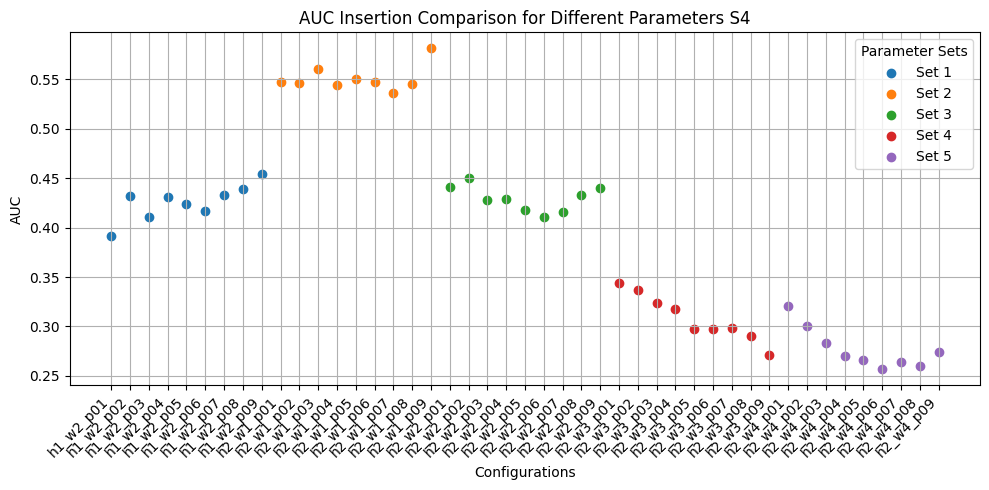

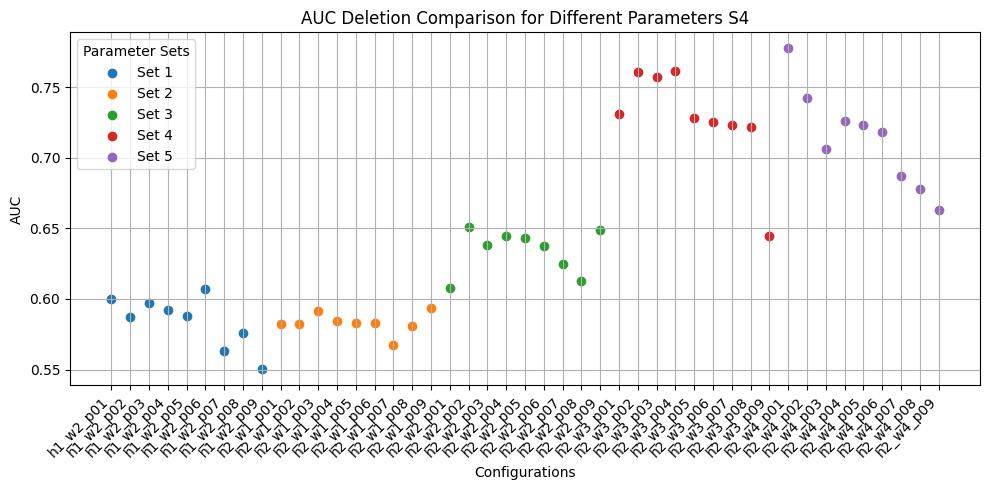

In [11]:
auc_ins_S4_all_grouped_setup = group_by_hw(total_auc_insertion_s4_all)
auc_del_S4_all_grouped_setup = group_by_hw(total_auc_deletion_s4_all)

plots.plot_multiple_auc_comparisons(auc_ins_S4_all_grouped_setup, title="AUC Insertion Comparison for Different Parameters S4")
plots.plot_multiple_auc_comparisons(auc_del_S4_all_grouped_setup, title="AUC Deletion Comparison for Different Parameters S4")